In [3]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
file_list = {'barcode13.bracken.microb.ncbi.txt', 'barcode14.bracken.microb.ncbi.txt', 'barcode15.bracken.microb.ncbi.txt', 'barcode16.bracken.microb.ncbi.txt'}
abundance_dict = {}

for file in file_list:
    barcode = pd.read_csv(file, sep='\t')
    barcode_name = file.split('.')[0]
    abundance_dict[barcode_name] = barcode.set_index('name')['fraction_total_reads']

abundance_matrix = pd.DataFrame(abundance_dict).fillna(0)
print(abundance_matrix)

                                barcode13  barcode16  barcode14  barcode15
name                                                                      
s__2-02-FULL-62-17 sp001770355    0.00049    0.00000    0.00000    0.00000
s__2-02-FULL-63-19 sp001770415    0.00075    0.00000    0.00000    0.00000
s__2-02-FULL-63-19 sp001770425    0.00075    0.00000    0.00000    0.00000
s__2-02-FULL-66-14 sp001770475    0.00297    0.00000    0.00000    0.00000
s__2-02-FULL-66-14 sp001771975    0.00563    0.00000    0.00000    0.00000
...                                   ...        ...        ...        ...
s__Z2-YC6860 sp003169835          0.00049    0.00000    0.00000    0.00000
s__ZC4RG25 sp002919265            0.00452    0.01089    0.02525    0.00730
s__ZC4RG25 sp003242645            0.00825    0.04906    0.09355    0.03300
s__ZC4RG40 sp003242475            0.00000    0.00000    0.00000    0.00038
s__ZC4RG42 sp003242425            0.00080    0.00000    0.00000    0.00000

[526 rows x 4 columns]


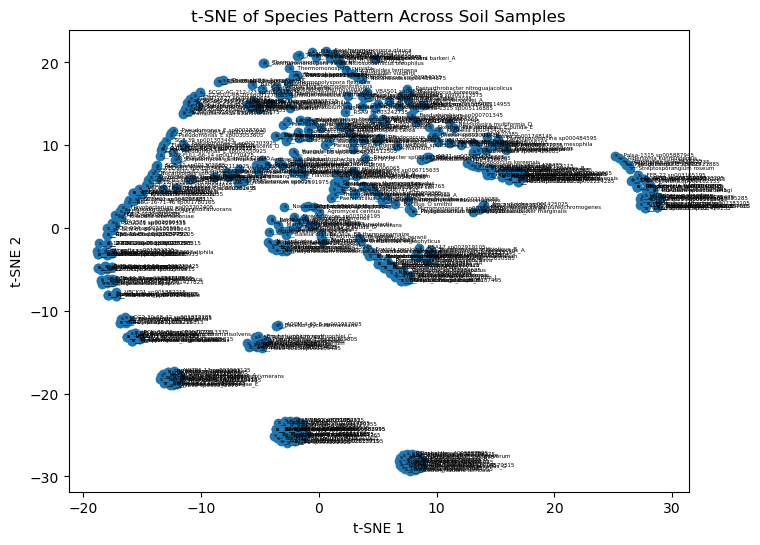

In [25]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(abundance_matrix)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])

for i, label in enumerate(abundance_matrix.index):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], label, fontsize=4)

plt.title("t-SNE of Species Pattern Across Soil Samples")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.savefig("t-SNE_Species_Pattern.png", dpi=300, bbox_inches='tight')
plt.show()

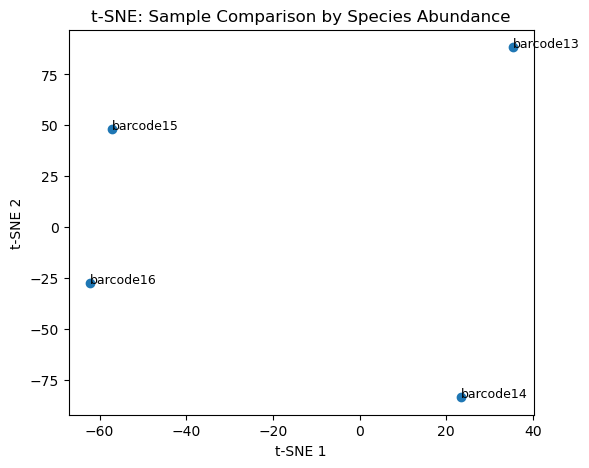

In [18]:
abundance_matrix_sample = pd.DataFrame(abundance_dict).fillna(0).T

tsne_2 = TSNE(n_components=2, perplexity=2, random_state=42)
tsne_results_2 = tsne_2.fit_transform(abundance_matrix_sample)

plt.figure(figsize=(6, 5))
plt.scatter(tsne_results_2[:, 0], tsne_results_2[:, 1])

for i, label in enumerate(abundance_matrix_sample.index):
    plt.text(tsne_results_2[i, 0], tsne_results_2[i, 1], label, fontsize=9)

plt.title("t-SNE: Sample Comparison by Species Abundance")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.savefig("t-SNE_Sample_Comparison.png", dpi=300, bbox_inches='tight')
plt.show()